## Base figures plotting filtering event examples

In [1]:
%matplotlib widget
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
plt.style.use("./actroot.mplstyle")
import numpy as np
import cmcrameri.cm as cmc

import base
import util as u
from importlib import reload


### Splitting recoils

In [2]:
## General settings
figsize = (8.5, 3.5)
twocols = ["dodgerblue", "crimson"]
threecols = ["crimson", "dodgerblue", "darkorange"]
alw = 1.5

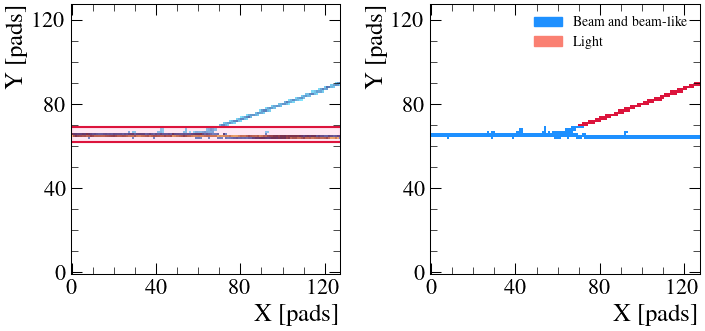

In [3]:
split = base.parse("../Events/run_157_entry_6749.dat")
# Figure
fig = plt.figure("split", figsize=figsize)
gs = fig.add_gridspec(1, 2, width_ratios=[1,1], height_ratios=[1])
fig.clf()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before splitting
base.plot_unique(split,"", ax1)
# Add lines
ax1.plot([0, 127], [69, 69], color="crimson", lw=1.5)
ax1.plot([0, 127], [62, 62], color="crimson", lw=1.5)
ax1.fill_between([0, 127], 69, 62, color="hotpink", alpha=0.15)

# After splitting
fsplit = np.full_like(split, np.nan)
beam = ~np.isnan(split[:, 62:70])
fsplit[:, 62:70] = np.where(beam, 0, fsplit[:, 62:70])
light = ~np.isnan(split[:, 70:])
fsplit[:, 70:] = np.where(light, 1, fsplit[:, 70:])
# Color map
ax2.imshow(fsplit.T, origin="lower", aspect="equal", interpolation="none", 
    cmap=plt.cm.colors.ListedColormap(twocols))
base.format_ax(ax2)

# Legend
psplit = [mpatches.Patch(color="dodgerblue", label="Beam and beam-like"),
          mpatches.Patch(color="salmon", label="Light")]
plt.legend(handles=psplit)

plt.show()
plt.gcf().savefig("./Outputs/split.pdf")

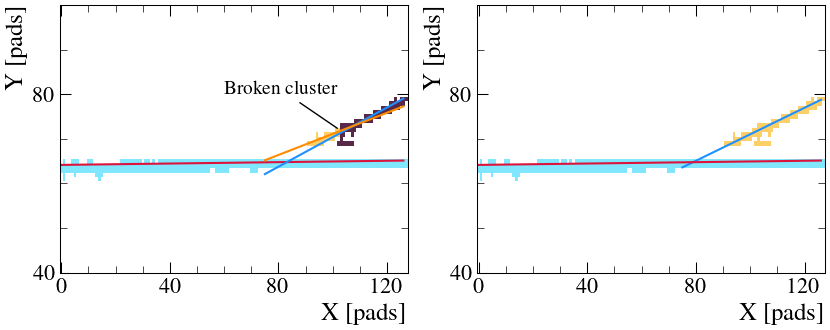

In [4]:
qbroken, idbroken = base.parse_with_id("../Events/run_157_entry_46581.dat")
qlines = base.parse_lines("../Events/lines_run_157_entry_46581.dat")

fig = plt.figure("broken", figsize=figsize)
gs = fig.add_gridspec(1, 2, height_ratios=[1])
fig.clf()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before splitting
base.plot_unique(idbroken,"", ax1, "auto")

l0 = base.plot_line(qlines[0], 0, 127, ax1, color=threecols[0], lw=alw)
l1 = base.plot_line(qlines[1], 75, 127, ax1, color=threecols[1], lw=alw)
l2 = base.plot_line(qlines[2], 75, 127, ax1, color=threecols[2], lw=alw)

# After correcting
_, okbroken = base.parse_with_id("../Events/ok_run_157_entry_46581.dat")
# Workaround: invert colors
okbroken[okbroken == 0] = -1
okbroken[okbroken == 1] = 0
okbroken[okbroken == -1] = 1
oklines = base.parse_lines("../Events/lines_ok_run_157_entry_46581.dat")
base.plot_unique(okbroken,"", ax2, "auto")
base.plot_line(oklines[0], 75, 127, ax2, color=threecols[1], lw=alw)
base.plot_line(oklines[1], 0, 127, ax2, color=threecols[0], lw=alw)

## Common settings for both
for ax in [ax1, ax2]:
    ax.set_ylim(40, 100)

# Annotations
ax1.annotate("Broken cluster", xy=(102.5, 72), xytext=(60, 80),
        fontsize=14,
        arrowprops=dict(arrowstyle="-"))

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/merge.pdf")


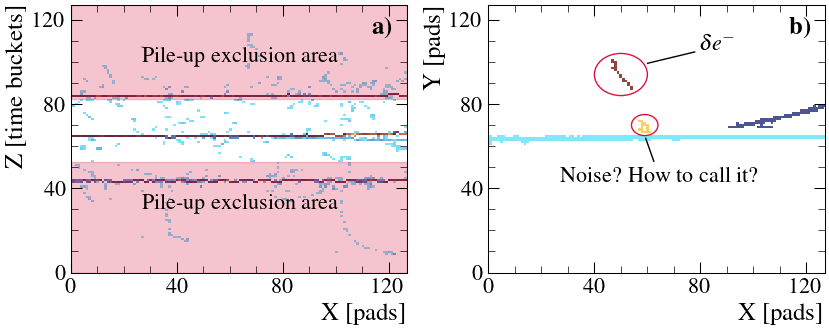

In [5]:
reload(u)
pileup = u.DataInterface("../Events/run_155_entry_1296.root")
pileup.fill("xz")

fig = plt.figure("pileup", figsize=figsize)
gs = fig.add_gridspec(1, 2, height_ratios=[1])
fig.clf()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Pileup
plt.sca(ax1)
pileup.imshow(False, "xz")
# Draw exclusion regions
ax1.axhspan(82.5, 127, color="crimson", alpha=0.25)
ax1.axhspan(0, 52.5, color="crimson", alpha=0.25)
ax1.annotate("Pile-up exclusion area", xy=(64, 100), ha="center", fontsize=16)
ax1.annotate("Pile-up exclusion area", xy=(64, 30), ha="center", fontsize=16)
# Identify subplot
u.add_subplot_label("a)", 0.925, 0.91)

# Clean delta
plt.sca(ax2)
delta = u.DataInterface("../Events/clean_delta.root")
delta.fill("xy")
delta.imshow(True)
# Delta electron
ax2.annotate(r"$\delta e^{-}$", xy=(59, 99), xytext=(80, 105),
            arrowprops=dict(arrowstyle="-"), fontsize=16)
c0 = mpl.patches.Circle((50, 94), 10, color="crimson", fill=False)
ax2.add_patch(c0)
# Noise
ax2.annotate("Noise? How to call it?", xy=(59, 65), xytext=(27, 43),
            arrowprops=dict(arrowstyle="-"), fontsize=16)
c1 = mpl.patches.Circle((59, 70), 5, color="crimson", fill=False)
ax2.add_patch(c1)
u.add_subplot_label("b)", 0.925, 0.91)

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/pileup_deltas.pdf")

### Fine treatment of event

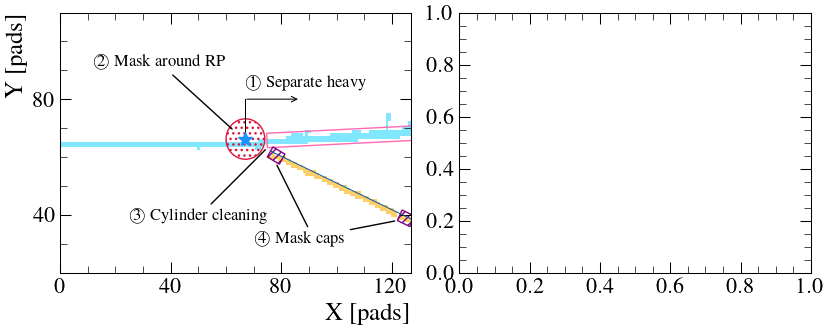

In [77]:
reload(u)
fineb = u.DataInterface("../Events/fine_before.root")
fineb.fill("xy")

fig = plt.figure("fine event", figsize=figsize)
gs = fig.add_gridspec(1, 2, height_ratios=[1])
fig.clf()
ax1 = fig.add_subplot(gs[0])
ax2 = fig.add_subplot(gs[1])

# Before
plt.sca(ax1)
fineb.imshow(True)
fineb.draw_rp(c="dodgerblue", lw=2, zorder=4)
# 1 Break heavy
ybreak = 80
rp = (fineb.rp[0], fineb.rp[1])
ax1.plot([fineb.rp[0], fineb.rp[0]], [rp[1], ybreak], lw=0.75, color="black")
ax1.annotate("", xy=(fineb.rp[0] + 20, ybreak), xytext=(fineb.rp[0]-0.5, ybreak),
            arrowprops=dict(arrowstyle="->", lw=0.75))
ax1.annotate(r"\textcircled{1} Separate heavy", xy=(fineb.rp[0], ybreak + 4), fontsize=12)

# 2 Mask region around rp
crp = mpl.patches.Circle((fineb.rp[0], fineb.rp[1]), 7, ec="crimson", fc="none", hatch="...")
ax1.add_patch(crp)
ax1.annotate(r"\textcircled{2} Mask around RP", xy=(63,69), xytext=(rp[0] - 55, rp[1] + 25),
            arrowprops=dict(arrowstyle="-"), fontsize=12)
# 3 Cilynder cleaning
rect = mpl.patches.Rectangle((75, rp[1] - 3), width=53, height=5, angle=2.75, color="hotpink", fill=False, lw=1)
ax1.add_patch(rect)
ax1.annotate(r"\textcircled{3} Cylinder cleaning", xy=(75, rp[1] - 3), xytext=(25,38), fontsize=12,
            arrowprops=dict(arrowstyle="-"))
# 4 Capping fit
fineb.draw_line(0, min=rp[0] + 9, lw=0.75)
cap0 = mpl.patches.Rectangle((75, 60), width=5, height=4, angle=-30, color="purple", 
                            ec="purple", fc="none", hatch="////")
cap1 = mpl.patches.Rectangle((122, 38), width=5, height=4, angle=-25, color="purple", 
                            ec="purple", fc="none", hatch="////")
ax1.add_patch(cap0)
ax1.add_patch(cap1)
ax1.annotate(r"\textcircled{4} Mask caps", xy=(122, 38), xytext=(70, 30), fontsize=12,
            arrowprops=dict(arrowstyle="-"))
ax1.annotate("", xy=(78, 58), xytext=(90, 35), fontsize=12,
            arrowprops=dict(arrowstyle="-"))
# fineb.draw_line(1)

# Set sizes
ax1.set_ylim(20, 110)

plt.tight_layout()
plt.show()
plt.savefig("./Outputs/fine.pdf")